<a href="https://colab.research.google.com/github/meng19951027/OUC-/blob/main/Submarine_landslides_shape_feature_and_machine_learning_feature_engineer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Box plot of submarine landslide shape features in South-West Iberia margin

,At,V,D,Lt,Ht,Wm
count,1552.000000,1552.000000,1552.000000,1552.000000,1551.000000,1552.000000
mean,17.993873,1.805755,-3033.536688,3.425091,514.573462,3.908865
std,51.520524,11.056721,1296.224517,3.332965,506.249900,3.672305
min,0.210900,0.000000,-5449.469000,0.412000,8.400000,0.486000
25%,2.812250,0.049000,-4101.613000,1.652000,191.700000,1.890750
50%,5.780000,0.153000,-3146.665000,2.524000,328.800000,2.797000
75%,12.590000,0.515000,-2068.109250,3.848750,664.900000,4.479500
max,1160.200000,249.845000,-145.646000,34.718000,3874.780000,46.348000


D:\Software\Anaconda\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


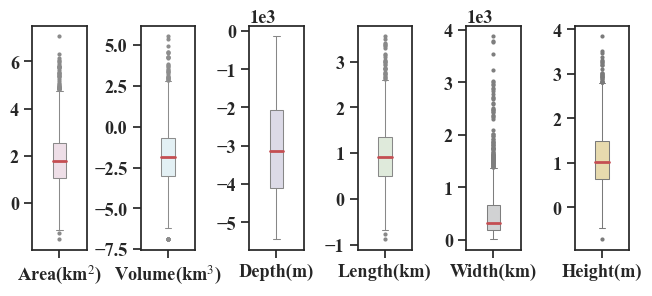

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.weight']='bold'
import seaborn as sns
import pandas as pd
df=pd.read_excel(r'D:\LSM\Submarine landslide-South-West Iberian\South-West Iberian margin submarine landslide\Magicland Data\MagicLand-DataUpdate.xlsx')
df2=df[['At','V','D','Lt','Ht','Wm']]
display(df2.describe())
sns.set(font= "Times new roman",style="ticks",font_scale=1.2)
new_result=[np.log(df2.At),np.log(df2.V),df2.D,np.log(df2.Lt),df2.Ht,np.log(df2.Wm)]
xlab=[r'Area(km$^2$)','Volume(km$^3$)','Depth(m)','Length(km)','Width(km)','Height(m)']
colors=['#F1DBE7','#E0F1F7','#DBD8E9','#DEECD9','#D0D2D4','#F1DFA4']
fig,ax=plt.subplots(1,6,figsize=(7.7,2.9))
for i in range(6):
    sns.boxplot(new_result[i],ax=ax[i],color=colors[i], linewidth=0.75,width=0.25,medianprops={"color": "r", "linewidth": 2},
               fliersize=2,flierprops={"marker": "o","color":"r"})
    ax[i].set_xticklabels([xlab[i]])
    ax[i].ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
# plt.tight_layout()
plt.subplots_adjust(wspace=1)
plt.savefig(r'landslide_boxplot_abstract.png',dpi=300,bbox_inches='tight')
plt.show()

# The area of landslide and no-landslide

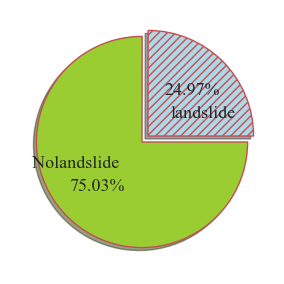

In [ ]:
import geopandas as gpd
gdf_sea_domain=gpd.read_file(r'D:\LSM\AOI\coastline\sea_domain.shp')
gdf_train=gpd.read_file(r'D:\LSM\AOI\landslide\landslide_area.shp')
import numpy as np
landslide_area=np.sum(gdf_train.iloc[:,3])*10e6

fig,ax=plt.subplots(1,1,figsize=(3,3))
patches, texts, autotexts=plt.pie([landslide_area/gdf_sea_domain.area[0],1-landslide_area/gdf_sea_domain.area[0]]
       ,labels=['landslide','  Nolandslide']
        ,explode=(0.08,0)
                                  ,autopct='%.2f%%'
        ,wedgeprops={'edgecolor':'r',
                    'linestyle':'-',
                    },colors=['lightblue','yellowgreen']
#                                   ,shadow=True
                                  ,shadow={'ox': 2, 'edgecolor': 'black', 'shade':5}
                                  ,labeldistance=0.3,textprops={'fontsize':13})
patches[0].set_hatch('////')
plt.tight_layout()
plt.savefig(r'landslide_proportion.png',dpi=300,bbox_inches='tight')
plt.show()

# The proportion of training and test set

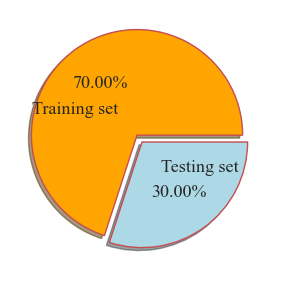

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
patches, texts, autotexts=plt.pie([0.7,0.3]
       ,labels=['Training set','Testing set']
        ,explode=(0.08,0)
       ,autopct='%.2f%%'

        ,wedgeprops={'edgecolor':'r',
                    'linestyle':'-'},colors=['orange','lightblue'],shadow=True,labeldistance=0.3,textprops={'fontsize':13})
plt.tight_layout()
plt.savefig(r'training_testing.png',dpi=300,bbox_inches='tight')
plt.show()

# Statistical characteristics of submarine landslide area

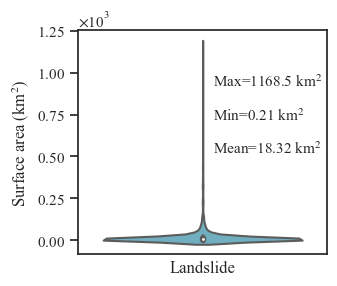

In [ ]:
fig,ax=plt.subplots(figsize=(3.5,3))
sns.set(font= "Times new roman",style="ticks",font_scale=1.2,rc={"font.size":11})
plt.rcParams['mathtext.fontset']='stix'
sns.violinplot(gdf_train.iloc[:,3],color='c',lw=2)
ax.set_xlabel(r'Landslide')
ax.set_ylabel(r'Surface area (km$^2$)')
from matplotlib.ticker import ScalarFormatter
y_formatter = ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(y_formatter)
max_area=np.max(gdf_train.iloc[:,3])
min_area=np.min(gdf_train.iloc[:,3])
mean_area=np.mean(gdf_train.iloc[:,3])
ax.text(0.54,0.75,'Max='+str(max_area)+r' km$^2$',transform=ax.transAxes)
ax.text(0.54,0.60,'Min='+str(min_area)+r' km$^2$',transform=ax.transAxes)
ax.text(0.54,0.45,'Mean='+str(mean_area)[:5]+r' km$^2$',transform=ax.transAxes)
ax.set_xticks([])
plt.tight_layout()
plt.savefig(r'landslide_statistic.png',dpi=300,bbox_inches='tight')
plt.show()

# The Bathymetry profile

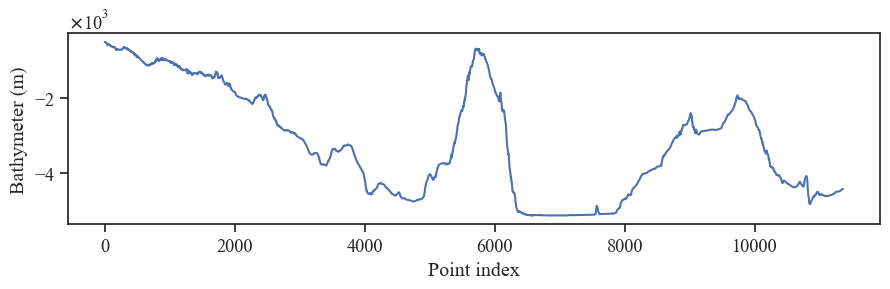

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font= "Times new roman",style="ticks",font_scale=1.2,rc={"font.size":10})
profile=np.loadtxt(r'剖面图数据.txt')
fig,ax=plt.subplots(1,1,figsize=(9,3))
plt.plot(profile[:,0],profile[:,2])
from matplotlib.ticker import ScalarFormatter
y_formatter = ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(y_formatter)
ax.set_xlabel(r'Point index')
ax.set_ylabel(r'Bathymeter (m)')
plt.tight_layout()
plt.savefig(r'bathymeter_profile.png',dpi=300,bbox_inches='tight')
plt.show()

# Feature engineer

## Correlation analysis of factors

{'Rebathymeter': {1: 0.14930382914512963, 2: 1.004212841798543, 3: 1.4919366845270066, 4: 1.9427025579478923, 5: 1.7508211455520393, 6: 1.1738325093087072, 7: 0.8299416577745931, 8: 0.2543917422746486}, 'Recurvatue': {1: 3.776194788092985, 2: 0.6764878762108466, 3: 3.6301649204928794}, 'Refault': {1: 1.710178680818631, 2: 1.047723798754353, 3: 0.8524758380987373, 4: 0.7544002319545162, 5: 0.6152428990580151, 6: 0.7023106883791708, 7: 0.7963638951927487, 8: 0.9769879555032841}, 'Repipeline': {1: 1.083314557839936, 2: 1.1427405212491313, 3: 0.7997323865640694, 4: 0.8846937057051155, 5: 0.8055581270043666, 6: 0.541782225276308, 7: 0.9131621269695129, 8: 1.383477105106164}, 'Resediment': {1: 1.5711127051579634, 2: 0.8113628341781128, 3: 0.7216727057502, 4: 0.0, 5: 0.4154856117250762}, 'Resesimic': {1: 0.6407053215715248, 2: 1.369357988622715, 3: 1.7801315680013794, 4: 1.8523819849084033, 5: 2.173372430062721, 6: 2.402216113054207, 7: 3.8236977637399354, 8: 1.6649268779194717}, 'Reslope': {

,Rebathymeter,Recurvatue,Refault,Repipeline,Resediment,Resesimic,Reslope,Revessel,Revolcano,class
0,3,2,8,2,2,1,5,1,8,1
1,4,2,8,2,2,1,1,1,8,1
2,2,2,8,2,2,1,4,1,8,1
3,2,2,8,2,2,1,1,1,8,1
4,2,1,8,2,2,2,7,1,8,1


,Rebathymeter,Recurvatue,Refault,Repipeline,Resediment,Resesimic,Reslope,Revessel,Revolcano
0,3,2,8,2,2,1,5,1,8
1,4,2,8,2,2,1,1,1,8
2,2,2,8,2,2,1,4,1,8
3,2,2,8,2,2,1,1,1,8
4,2,1,8,2,2,2,7,1,8


,Bathymeter,Slope,Curvatue,Earthquake,Fault,Volcano,Sediment,Vessel,Pipeline
0,3,5,2,1,8,8,2,1,2
1,4,1,2,1,8,8,2,1,2
2,2,4,2,1,8,8,2,1,2
3,2,1,2,1,8,8,2,1,2
4,2,7,1,2,8,8,2,1,2


,Bathymeter,Slope,Curvatue,Earthquake,Fault,Volcano,Sediment,Vessel,Pipeline
Bathymeter,1.000000,-0.281854,0.025487,-0.218699,0.344600,0.034297,0.007864,-0.436639,-0.268026
Slope,-0.281854,1.000000,-0.033603,0.210426,-0.149164,-0.128628,-0.194686,0.153025,0.081377
Curvatue,0.025487,-0.033603,1.000000,-0.013890,0.030125,0.057953,0.003042,-0.025862,-0.019588
Earthquake,-0.218699,0.210426,-0.013890,1.000000,-0.302837,-0.045642,-0.034632,0.131158,0.110390
Fault,0.344600,-0.149164,0.030125,-0.302837,1.000000,-0.025567,-0.116436,-0.188829,-0.437379
Volcano,0.034297,-0.128628,0.057953,-0.045642,-0.025567,1.000000,0.043637,0.047241,0.054255
Sediment,0.007864,-0.194686,0.003042,-0.034632,-0.116436,0.043637,1.000000,-0.010216,0.097499
Vessel,-0.436639,0.153025,-0.025862,0.131158,-0.188829,0.047241,-0.010216,1.000000,0.183253
Pipeline,-0.268026,0.081377,-0.019588,0.110390,-0.437379,0.054255,0.097499,0.183253,1.000000


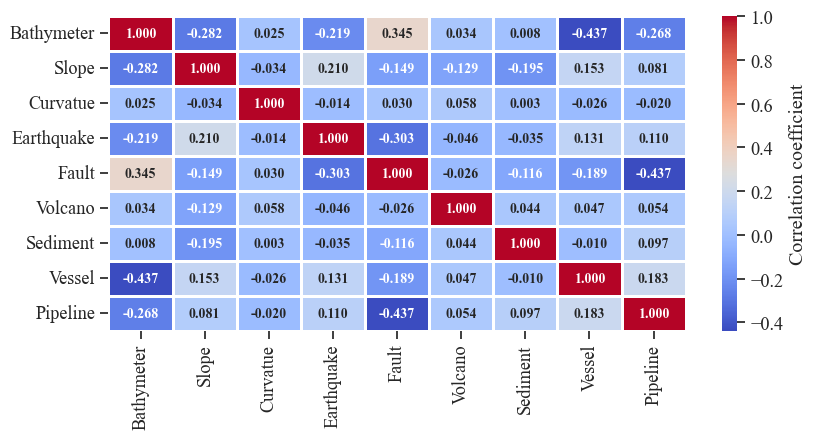

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rasterio
from matplotlib import cm,colors
from rasterio.plot import show
import pandas as pd
sns.set(font= "Times new roman",style="ticks",font_scale=1.2,rc={"font.size":10})
import warnings
warnings.filterwarnings("ignore")
FR=pd.read_excel(r'D:\LSM_script\LSM_ML\FR.xlsx',sheet_name='FR_alter'
                 ,index_col=[0,1])
FR_alter = FR.groupby(level=0).apply(lambda x: x.droplevel(0)['FR'].to_dict()).to_dict()
print(FR_alter)
landslide_nolandslide=pd.read_excel(r'D:\LSM_script\LSM_ML\ML_dataset.xlsx',sheet_name=0)
display(landslide_nolandslide.head())
XX=landslide_nolandslide.iloc[:,:-1]
display(XX.head())
YY=landslide_nolandslide.iloc[:,-1]
Feature=XX.loc[:,['Rebathymeter','Reslope','Recurvatue','Resesimic','Refault','Revolcano','Resediment','Revessel','Repipeline']]
Feature.columns=['Bathymeter','Slope','Curvatue','Earthquake','Fault','Volcano','Sediment','Vessel','Pipeline']
display(Feature.head())
fr_corr=Feature.corr('pearson')
display(fr_corr)
fig,ax=plt.subplots(1,1,figsize=(8.5,4.5))
sns.heatmap(fr_corr,annot=True,cmap='coolwarm',lw=2,fmt=".3f"
                 ,cbar_kws={"label": "Correlation coefficient"},ax=ax,annot_kws={'fontweight':'bold'})
fig.tight_layout()
plt.show()

## Multicollinearity analysis of factors

     variable       vif
0  Bathymeter  1.190741
1       Slope  1.176262
2    Curvatue  1.004647
3  Earthquake  1.081351
4     Volcano  1.025264
5    Sediment  1.054240
6    Pipeline  1.098409


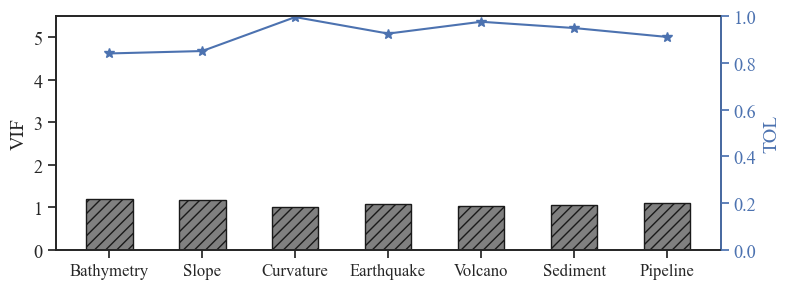

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(df):
    input_path = "E:\\Data\\"
    df = df.dropna(axis=0, how='any')
    df['const'] = 1
    x = np.array(df)
    vif_list = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
    df_vif = pd.DataFrame({'variable': list(df.columns), 'vif': vif_list})
    df_vif = df_vif[~(df_vif['variable'] == 'const')]
    print(df_vif)
    return df_vif
Feature2=Feature.drop(['Fault','Vessel'], axis='columns')
sns.set(font= "Times new roman",style="ticks",font_scale=1.2,rc={"font.size":10})
df_vif=check_vif(Feature2)
tol=1/df_vif.iloc[:,-1]
vif=df_vif.iloc[:,-1]
x=['Bathymetry','Slope','Curvature','Earthquake','Volcano','Sediment','Pipeline']
fig,ax1 = plt.subplots(figsize=(8,3))
ax2 = ax1.twinx()
ax1.bar(x,vif,color='grey',hatch='///',label='VIF',edgecolor='k',width=0.5)
ax1.tick_params(axis='x'
                ,labelrotation=0
                ,labelsize=12,
               )
ax2.plot(x,tol,'b-*',label='TOL',markersize=7)
ax1.set_ylim(0,5.5)
ax1.set_ylabel('VIF')
ax2.set_ylabel('TOL',color = 'b')
ax2.spines['right'].set_color('b')
ax2.tick_params(color='b',labelcolor='b')
ax2.set_ylim(0,1)
fig.tight_layout()
fig.savefig(r'multicollinearity.png',dpi=300,bbox_inches='tight')
plt.show()